# 유방암 종양 예측

## 악성 종양인지, 양성 종양(정상)인지 예측

## 데이터셋 불러오기

* radius : 반경
* texture : 질감
* perimeter : 둘레
* area : 면적
* smoothness : 매끄러움
* compactness : 조그만 정도
* concavity : 윤곽의 오목함
* concave points : 윤곽의 오목한 부분의 수
* symmetry : 대칭
* fractal dimension : 프랙탈 차원
* target : Malignant-악성 종양 / Benign-양성 종양(정상)
---
* mean ~ : 데이터별 평균 값
* ~ error : 데이터별 표준편차 값
* worst ~ : 데이터별 가장 큰 3개의 평균으로 만든 값

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DrKAI/dataset/main/breast_cancer.csv')

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 데이터 전처리

<details><summary>Hint</summary>

* x, y 구분 필요
* y에 대한 전처리 필요
* 데이터셋 구분 필요

</details>

### x, y 구분

In [4]:
t = 'target'
x = data.drop(t, axis=1)
y = data[t]

# 확인
x.shape, y.shape

((569, 30), (569,))

### train/test dataset 나누기

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### y 전처리

In [7]:
y_train.shape

(455,)

In [8]:
y_train.value_counts()

Benign       289
Malignant    166
Name: target, dtype: int64

In [9]:
# Benign -> 0, Malignant -> 1로 변환
y_train = y_train.map({'Benign':0, 'Malignant':1})
y_test = y_test.map({'Benign':0, 'Malignant':1})

y_train.shape, y_test.shape

((455,), (114,))

--> sigmoid로 진행

## Locally connected layer를 구성하기 위한 feature 설정

* mean, error, worst를 각 feature별로 묶어 새로운 변수를 만든다.
        ex) mean radius, radius error, worst radius

<details><summary> Hint </summary>

* x의 train 구조와 test 구조는 동일해야 한다.

</details>

In [10]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [11]:
# 열 이름 나누기
l_mean = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']
l_error = ['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error']
l_worst = ['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

# x_train 데이터 나누기
tr_x_mean = x_train.loc[:,l_mean]
tr_x_error = x_train.loc[:,l_error]
tr_x_worst = x_train.loc[:,l_worst]

# 확인
tr_x_mean.shape, tr_x_error.shape, tr_x_worst.shape

((455, 10), (455, 10), (455, 10))

In [12]:
# x_test 데이터 나누기
te_x_mean = x_test.loc[:,l_mean]
te_x_error = x_test.loc[:,l_error]
te_x_worst = x_test.loc[:,l_worst]

# 확인
te_x_mean.shape, te_x_error.shape, te_x_worst.shape

((114, 10), (114, 10), (114, 10))

### Locally connected layer를 구성하기 위한 feature 설정 - 2

In [13]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [14]:
# 각 feature별로 묶기_리스트에 담기
radius = ['mean radius', 'radius error', 'worst radius']
texture = ['mean texture', 'texture error','worst texture']
perimeter = ['mean perimeter', 'perimeter error', 'worst perimeter']
area = ['mean area', 'area error', 'worst area']
smoothness = ['mean smoothness', 'smoothness error', 'worst smoothness']
compactness = ['mean compactness', 'compactness error', 'worst compactness']
concavity = ['mean concavity', 'concavity error', 'worst concavity']
concave_points = ['mean concave points', 'concave points error', 'worst concave points']
symmetry = ['mean symmetry', 'symmetry error', 'worst symmetry']
fractal_dimension = ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension']

In [15]:
# train별로 데이터 나누기
tr_x_radius = x_train.loc[:,radius]
tr_x_texture = x_train.loc[:,texture]
tr_x_perimeter = x_train.loc[:,perimeter]
tr_x_area = x_train.loc[:,area]
tr_x_smoothness = x_train.loc[:,smoothness]
tr_x_compactness = x_train.loc[:,compactness]
tr_x_concavity = x_train.loc[:,concavity]
tr_x_concave_points = x_train.loc[:,concave_points]
tr_x_symmetry = x_train.loc[:,symmetry]
tr_x_fractal_dimension = x_train.loc[:,fractal_dimension]

In [16]:
# 형태 확인
tr_x_radius.shape, tr_x_texture.shape, tr_x_perimeter.shape, tr_x_area.shape, tr_x_smoothness.shape, tr_x_compactness.shape, tr_x_concavity.shape, tr_x_concave_points.shape, tr_x_symmetry.shape, tr_x_fractal_dimension.shape

((455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3))

In [17]:
# test별로 데이터 나누기
te_x_radius = x_test.loc[:,radius]
te_x_texture = x_test.loc[:,texture]
te_x_perimeter = x_test.loc[:,perimeter]
te_x_area = x_test.loc[:,area]
te_x_smoothness = x_test.loc[:,smoothness]
te_x_compactness = x_test.loc[:,compactness]
te_x_concavity = x_test.loc[:,concavity]
te_x_concave_points = x_test.loc[:,concave_points]
te_x_symmetry = x_test.loc[:,symmetry]
te_x_fractal_dimension = x_test.loc[:,fractal_dimension]

In [18]:
# 형태 확인
te_x_radius.shape, te_x_texture.shape, te_x_perimeter.shape, te_x_area.shape, te_x_smoothness.shape, te_x_compactness.shape, te_x_concavity.shape, te_x_concave_points.shape, te_x_symmetry.shape, te_x_fractal_dimension.shape

((114, 3),
 (114, 3),
 (114, 3),
 (114, 3),
 (114, 3),
 (114, 3),
 (114, 3),
 (114, 3),
 (114, 3),
 (114, 3))

# 모델링
- Locally connected Model

1. 윗 단계에서 생성한 변수의 **형태**를 이용하여, 각 변수별 input layer를 만든다.
2. node가 12개인 hidden layer를 **각각** 생성하여, 각 input layer와 연결한다.
3. 생성된 hidden layer를 add 한다.
---
4. 전체 변수를 이용한 input layer를 만든다.
5. 3번 단계로 add 된 레이어와 4번 단계로 만들어진 input layer를 concat한다.
---
6. node가 128개인 hidden layer를 5번 단계로 concat된 레이어와 연결한다.
7. output layer를 생성하고 compile 한다.

In [19]:
# 라이브러리 불러오기
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Concatenate
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [20]:
# 변수 형태 확인
x_train.shape, tr_x_mean.shape, tr_x_error.shape, tr_x_worst.shape, y_train.shape

((455, 30), (455, 10), (455, 10), (455, 10), (455,))

In [21]:
############ Functional API ############


### 1. 세션 클리어
clear_session()

### 2. 레이어 엮기

# 새로운 변수별 input layer 만들기 (mean, error, weight)
# hidden layer를 각 input layer와 연결하기
# mean
il_m = Input(shape=(10,), name='input_mean')
hl_m = Dense(12, activation=relu, name='hidden_mean')(il_m)

# error
il_e = Input(shape=(10,), name='input_error')
hl_e = Dense(12, activation=relu, name='hidden_error')(il_e)

# weight 
il_w = Input(shape=(10,), name='input_weight')
hl_w = Dense(12, activation=relu, name='hidden_weight')(il_w)



# 생성된 hidden layer를 add 하기
al = Add(name='add_layer')([hl_m, hl_e, hl_w] )

# 전체 변수를 이용한 input layer
il = Input(shape=(30,), name='input_total')

# add layer와 전체 input layer를 concat 하기
cl = Concatenate(name='concatenate_layer')([al, il] )

# concat layer와 연결하여 128개 노드를 갖는 hidden layer
hl = Dense(128, activation=relu, name='hidden_layer')(cl)

# hidden layer와 연결하여 클래스 1로 
ol = Dense(1, activation=sigmoid, name='output_layer')(hl)

### 3. 모델 시작과 끝 설정
model = Model([il_m, il_e, il_w, il], ol)


### 4. 컴파일
model.compile(loss=binary_crossentropy,  # y 의 클래스 2개 -> 이진분류
              metrics='accuracy',        # crossentropy는 직관적이지 않기 때문에 보조적 자료로 정확도 보기
              optimizer=Adam())          # 최적화 방법은 adam


## 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_mean (InputLayer)        [(None, 10)]         0           []                               
                                                                                                  
 input_error (InputLayer)       [(None, 10)]         0           []                               
                                                                                                  
 input_weight (InputLayer)      [(None, 10)]         0           []                               
                                                                                                  
 hidden_mean (Dense)            (None, 12)           132         ['input_mean[0][0]']             
                                                                                              

### 모델 시각화 

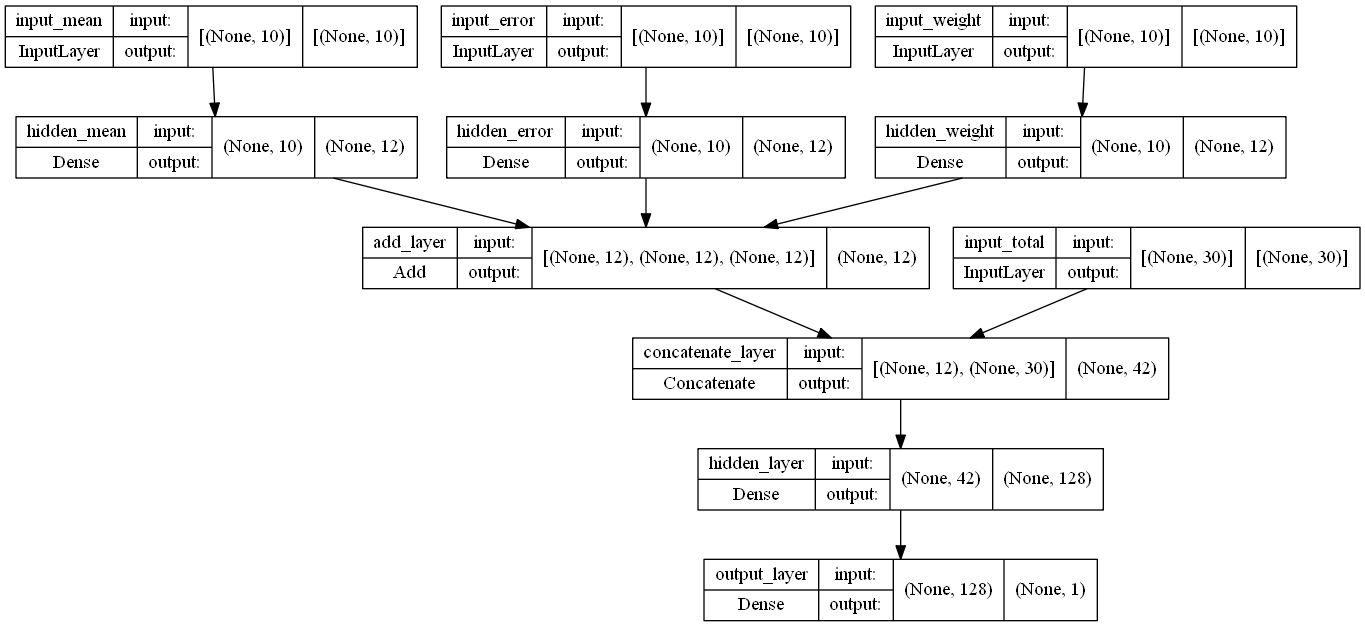

In [22]:
plot_model(model, show_shapes=True, show_layer_names=True)

## 학습하기

In [23]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [24]:
model.fit([tr_x_mean, tr_x_error, tr_x_worst, x_train], y_train,
          epochs=3000,
          verbose=1, 
          validation_split=0.2,
          callbacks=[es])

Epoch 1/3000
12/12 [==============================] - 1s 19ms/step - loss: 9.4162 - accuracy: 0.5467 - val_loss: 1.5421 - val_accuracy: 0.6374
Epoch 2/3000
12/12 [==============================] - 0s 4ms/step - loss: 1.6618 - accuracy: 0.7363 - val_loss: 0.2311 - val_accuracy: 0.9560
Epoch 3/3000
12/12 [==============================] - 0s 4ms/step - loss: 1.0246 - accuracy: 0.8626 - val_loss: 0.5231 - val_accuracy: 0.8571
Epoch 4/3000
12/12 [==============================] - 0s 4ms/step - loss: 1.2760 - accuracy: 0.7912 - val_loss: 0.4945 - val_accuracy: 0.8681
Epoch 5/3000
12/12 [==============================] - 0s 4ms/step - loss: 0.7185 - accuracy: 0.8736 - val_loss: 0.2788 - val_accuracy: 0.9121
Epoch 6/3000
12/12 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.8681 - val_loss: 0.2729 - val_accuracy: 0.9121
Epoch 7/3000
12/12 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.8846 - val_loss: 0.1593 - val_accuracy: 0.9560
Epoch

### 예측

In [25]:
# 예측
y_pred = model.predict([te_x_mean, te_x_error, te_x_worst, x_test])

for idx, val in enumerate(y_pred):
    if val >= 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0

In [26]:
model.evaluate([te_x_mean, te_x_error, te_x_worst, x_test], y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9386


[0.2675020098686218, 0.9385964870452881]

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        68
           1       0.98      0.87      0.92        46

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



#### My 모델 성능

- Accuracy : 0.9211
- 1의 Recall : 0.83
- 1의 Precision : 0.97
- 0의 Recall : 0.99

---

# 모델링 2

- Locally connected Model


1. 새로 만든 10개의 feature로 input layer 만들기
2. 각각의 input layer의 hidden layer연결하기
3. hidden layer를 하나의 add 레이어로 만들기
4. 전체 feature를 가진 하나의 input layer 만들기
5. add 레이어와 하나의 전체 input layer를 concat을 이용하여 하나의 layer로 만들기
6. concat layer를 hidden layer로 연결하기
7. output layer 만들기
8. compile

In [28]:
# 변수 형태 확인 - 10개의 x 데이터
tr_x_radius.shape, tr_x_texture.shape, tr_x_perimeter.shape, tr_x_area.shape, tr_x_smoothness.shape, tr_x_compactness.shape, tr_x_concavity.shape, tr_x_concave_points.shape, tr_x_symmetry.shape, tr_x_fractal_dimension.shape

((455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3),
 (455, 3))

In [29]:
# 변수 형태 확인
x_train.shape, y_train.shape

((455, 30), (455,))

In [37]:
######## Functional API ########

# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기

#### 단계 1, 2 진행 ####
# 각각의 feature들의 input layer와 hidden layer를 생성하여 연결
# hidden layer 노드 수 : 8, activation = relu
il_radius = Input(shape=(3,))
hl_radius = Dense(8, activation=relu)(il_radius)

il_texture = Input(shape=(3,))
hl_texture = Dense(8, activation=relu)(il_texture)

il_perimeter = Input(shape=(3,))
hl_perimeter = Dense(8, activation=relu)(il_perimeter)

il_area = Input(shape=(3,))
hl_area = Dense(8, activation=relu)(il_area)

il_smoothness = Input(shape=(3,))
hl_smoothness = Dense(8, activation=relu)(il_smoothness)

il_compactness = Input(shape=(3,))
hl_compactness = Dense(8, activation=relu)(il_compactness)

il_concavity = Input(shape=(3,))
hl_concavity = Dense(8, activation=relu)(il_concavity)

il_concave_points = Input(shape=(3,))
hl_concave_points = Dense(8, activation=relu)(il_concave_points)

il_symmetry = Input(shape=(3,))
hl_symmetry = Dense(8, activation=relu)(il_symmetry)

il_fractal_dimension = Input(shape=(3,))
hl_fractal_dimension = Dense(8, activation=relu)(il_fractal_dimension)


#### 단계 3 진행 ####
# 앞서 진행한 각 feature별 hidden layer를 Add로 하나의 layer로 만들기
hls = [hl_radius, hl_texture, hl_perimeter, hl_area, hl_smoothness, hl_compactness,
       hl_concavity, hl_concave_points, hl_symmetry, hl_fractal_dimension]
al = Add()(hls)


#### 단계 4 진행 ####
# 전체 feature를 가진 하나의 input layer 만들기
il = Input(shape=(30,))


#### 단계 5 진행 ####
# add 레이어와 하나의 전체 input layer를 concat을 이용하여 하나의 layer로 만들기
cl = Concatenate()([al, il])


#### 단계 6 진행 ####
# concat layer를 hidden layer로 연결하기
hl = Dense(128, activation=relu)(cl)

#### 단계 7 진행 ####
# output layer 만들기
ol = Dense(1, activation=sigmoid)(hl)



# 3. 모델 시작과 끝 설정
ill = [il_radius, il_texture, il_perimeter, il_area, il_smoothness, il_compactness,
       il_concavity, il_concave_points, il_symmetry, il_fractal_dimension, il]
model = Model(ill, ol)

# 4. 컴파일
model.compile(loss=binary_crossentropy,
              metrics='accuracy',
              optimizer=Adam())

## 모델 요약하기
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

### 모델 시각화

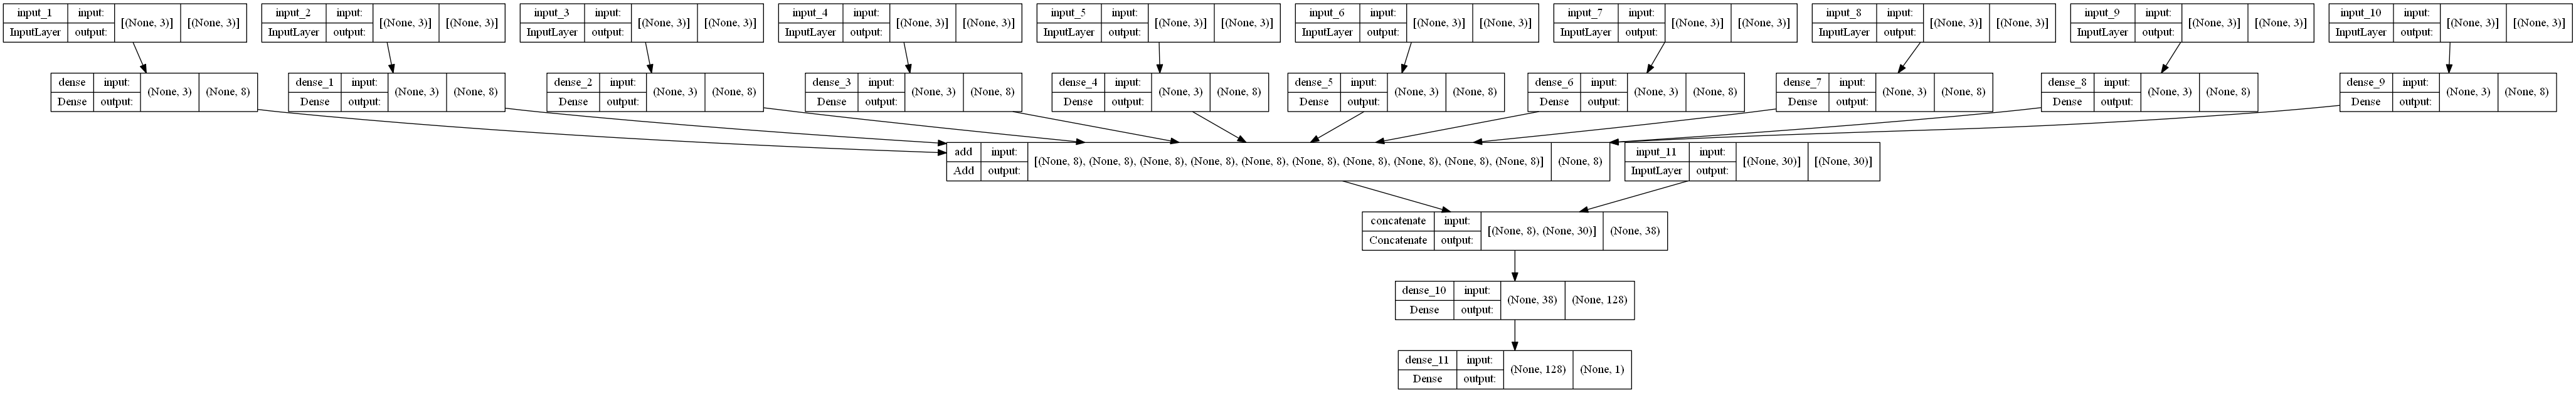

In [38]:
plot_model(model, show_shapes=True)

### 학습

In [39]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [40]:
x_l = [tr_x_radius, tr_x_texture, tr_x_perimeter, tr_x_area, tr_x_smoothness, tr_x_compactness, tr_x_concavity, tr_x_concave_points, tr_x_symmetry, tr_x_fractal_dimension, x_train]
model.fit(x_l, y_train, epochs=3000, verbose=1, validation_split=0.15, callbacks=es)

Epoch 1/3000
13/13 [==============================] - 1s 24ms/step - loss: 39.3962 - accuracy: 0.5026 - val_loss: 5.3312 - val_accuracy: 0.2029
Epoch 2/3000
13/13 [==============================] - 0s 5ms/step - loss: 3.5146 - accuracy: 0.4352 - val_loss: 2.0302 - val_accuracy: 0.4203
Epoch 3/3000
13/13 [==============================] - 0s 5ms/step - loss: 1.2886 - accuracy: 0.6606 - val_loss: 2.2072 - val_accuracy: 0.4783
Epoch 4/3000
13/13 [==============================] - 0s 5ms/step - loss: 5.3201 - accuracy: 0.5751 - val_loss: 0.1848 - val_accuracy: 0.9565
Epoch 5/3000
13/13 [==============================] - 0s 5ms/step - loss: 1.2182 - accuracy: 0.7927 - val_loss: 0.1493 - val_accuracy: 0.9565
Epoch 6/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.7194 - accuracy: 0.8627 - val_loss: 0.1271 - val_accuracy: 0.9710
Epoch 7/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.5735 - accuracy: 0.8731 - val_loss: 1.0372 - val_accuracy: 0.7536
Epoc

### 예측하기

In [42]:
x_l = [te_x_radius, te_x_texture, te_x_perimeter, te_x_area, 
       te_x_smoothness, te_x_compactness, te_x_concavity, te_x_concave_points, 
       te_x_symmetry, te_x_fractal_dimension, x_test]
y_pred = model.predict(x_l)


array([[0.01364347],
       [0.00026673],
       [0.00097975],
       [0.00011054],
       [0.00404304]], dtype=float32)

In [44]:
# 예측값과 실제값 앞부분만 비교
print(y_pred[:5])
print('-'*20)
print(y_test[:5])

[[0.01364347]
 [0.00026673]
 [0.00097975]
 [0.00011054]
 [0.00404304]]
--------------------
453    0
153    0
385    1
67     0
528    0
Name: target, dtype: int64


In [45]:
# 예측값을 0, 1로 변환하기
for idx, val in enumerate(y_pred):
    if val  >= 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0

In [48]:
# 확인
y_pred[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [50]:
# 모델의 정확도
model.evaluate(x_l, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.9386


[0.31583940982818604, 0.9385964870452881]

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        68
           1       0.98      0.87      0.92        46

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



---
## Fully Connected 모델링
- Hidden Layer 2개 층, 노드 512개씩

In [53]:
### Functional API

# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기

il = Input(shape=(30,))
hl = Dense(512, activation=relu)(il)
hl = Dense(512, activation=relu)(hl)
ol = Dense(1, activation=sigmoid)(hl)

# 3. 모델 시작과 끝 설정
# ils = 
model = Model(il, ol)

# 4. 컴파일
model.compile(loss=binary_crossentropy, 
              metrics='accuracy',
              optimizer=Adam())

## 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 279,041
Trainable params: 279,041
Non-trainable params: 0
_________________________________________________________________


In [54]:
# 학습
model.fit(x_train, y_train,
          epochs=3000,
          verbose=1, 
          validation_split=0.2,
          callbacks=[es])

Epoch 1/3000
12/12 [==============================] - 0s 16ms/step - loss: 31.0063 - accuracy: 0.5357 - val_loss: 11.6091 - val_accuracy: 0.7582
Epoch 2/3000
12/12 [==============================] - 0s 7ms/step - loss: 10.6772 - accuracy: 0.6154 - val_loss: 3.6862 - val_accuracy: 0.8681
Epoch 3/3000
12/12 [==============================] - 0s 6ms/step - loss: 4.9886 - accuracy: 0.7692 - val_loss: 1.6188 - val_accuracy: 0.8791
Epoch 4/3000
12/12 [==============================] - 0s 7ms/step - loss: 2.1435 - accuracy: 0.8462 - val_loss: 0.3668 - val_accuracy: 0.9670
Epoch 5/3000
12/12 [==============================] - 0s 7ms/step - loss: 1.9430 - accuracy: 0.8462 - val_loss: 2.4108 - val_accuracy: 0.7143
Epoch 6/3000
12/12 [==============================] - 0s 6ms/step - loss: 1.4799 - accuracy: 0.8462 - val_loss: 0.4208 - val_accuracy: 0.9231
Epoch 7/3000
12/12 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.8929 - val_loss: 0.2967 - val_accuracy: 0.9451
Ep

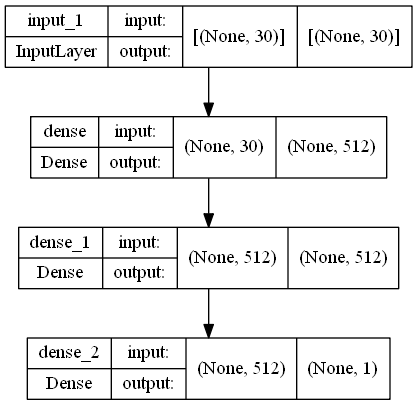

In [55]:
plot_model(model, show_shapes=True)

In [56]:
# 예측
y_pred = model.predict(x_test)

for idx, val in enumerate(y_pred):
    if val >= 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0

In [57]:
# 정확도
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.9386


[0.2984243929386139, 0.9385964870452881]

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        68
           1       0.98      0.87      0.92        46

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



#### Fully Connected 모델 성능

- Accuracy : 0.9298
- 1의 Recall : 0.83
- 1의 Precision : 1.00
- 0의 Recall : 1.00

---
## 평가

1. 모델의 정확도를 확인하시오. --> Accuracy
2. 악성이라 예측한 것 중 실제 악성으로 나온 비율을 구하시오. --> 1의 Recall
3. 실제 악성 중 모델이 악성이라 예측한 것의 비율을 구하시오. --> 1의 Precision
4. 정상이라 예측한 것 중 실제 정상으로 나온 비율을 구하시오. --> 0의 Recall

### My model   vs   Fully Connected Model

1. Accuracy : 0.9211 vs 0.9298  <br>
    -> Fully Connected Model이 더 높음    
<br>

2. 1의 Recall : 0.83 vs 0.83  <br>
    -> 두 모델 동일
<br>
    
3. 1의 Precision : 0.97 vs 1.00  <br>
    -> Fully Connected Model이 더 높음    
<br>
    
4. 0의 Recall : 0.99 vs 1.00  <br>
    -> Fully Connected Model이 더 높음    